<a href="https://colab.research.google.com/github/amitsv26/Pattern-Recognition/blob/main/FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Plotting Sample Images

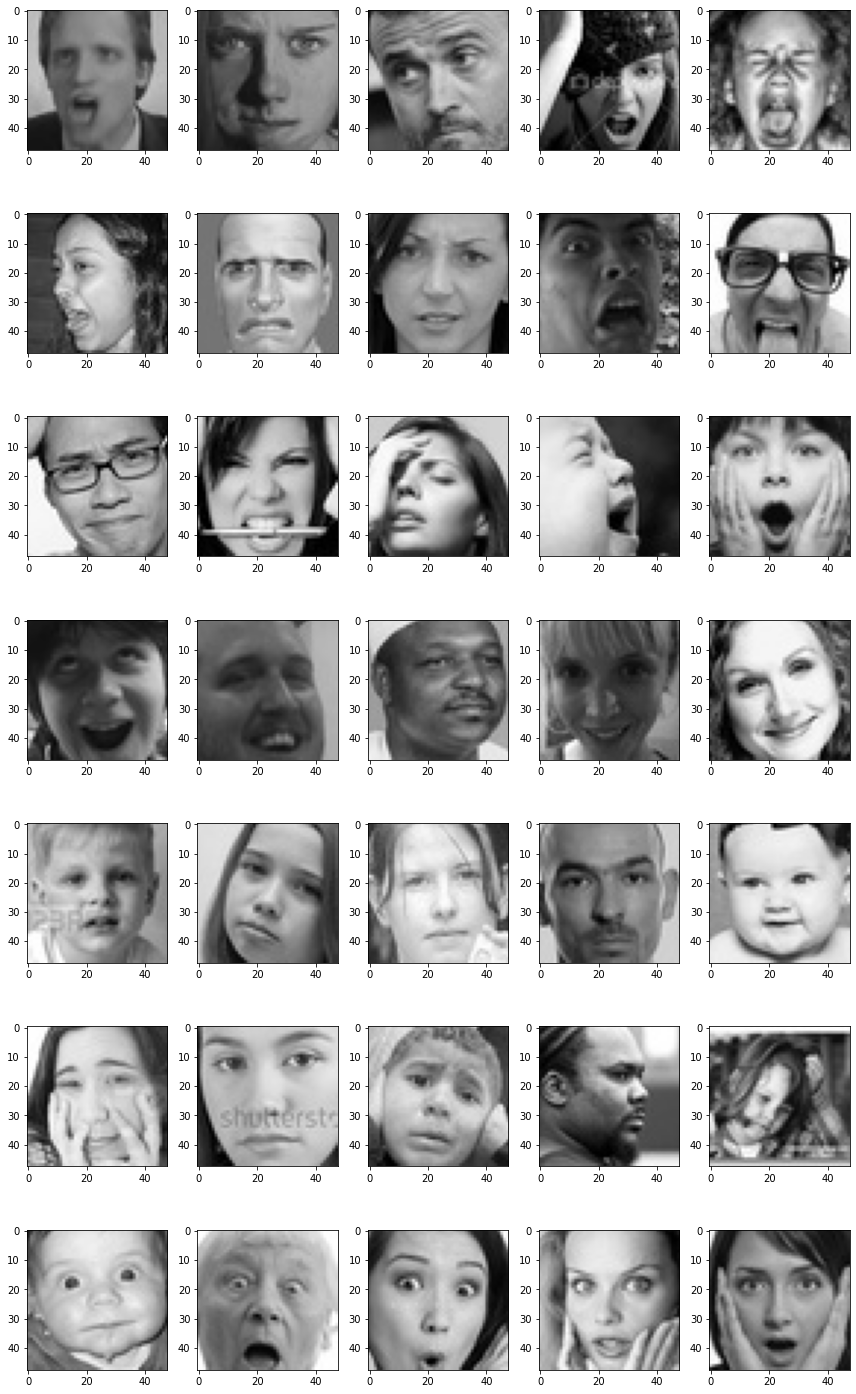

In [11]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def plot_example_images(plt):
    img_size = 48
    plt.figure(0, figsize=(12,20))
    ctr = 0

    for expression in os.listdir("/content/drive/My Drive/PR_Dataset/train/"):
        for i in range(1,6):
            ctr += 1
            plt.subplot(7,5,ctr)
            img = load_img("/content/drive/My Drive/PR_Dataset/train/" + expression + "/" +os.listdir("/content/drive/My Drive/PR_Dataset/train/" + expression)[i], target_size=(img_size, img_size))
            plt.imshow(img, cmap="gray")

    plt.tight_layout()
    return plt

plot_example_images(plt).show()

Counting no. of images in each dataset

In [12]:
for expression in os.listdir("/content/drive/My Drive/PR_Dataset/train/"):
    print(str(len(os.listdir("/content/drive/My Drive/PR_Dataset/train/" + expression))) + " " + expression + " images")

3995 angry images
436 disgust images
4107 fear images
7214 happy images
4965 neutral images
4830 sad images
3171 surprise images


Generate training and Validation batches

In [15]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("/content/drive/My Drive/PR_Dataset/train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("/content/drive/My Drive/PR_Dataset/test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28718 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Create CNN Model